# Importing the datasets

In [1]:
import pandas as pd


In [2]:
customers_df = pd.read_csv('/content/customers_dataset.csv')

In [3]:
geo_df = pd.read_csv('/content/geolocation_dataset.csv')

/tmp/ipython-input-605145284.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_df = pd.read_csv('/content/geolocation_dataset.csv')


In [5]:
order_items_df = pd.read_csv('/content/order_items_dataset.csv')

In [6]:
order_payments_df = pd.read_csv('/content/order_payments_dataset.csv')

In [8]:
order_reviews_df = pd.read_csv('/content/order_reviews_dataset.csv')

In [ ]:
orders_df = pd.read_csv('/content/orders_dataset.csv')
cat_map_df = pd.read_csv('/content/product_category_name_translation.csv')
products_df = pd.read_csv('/content/products_dataset.csv')
sellers_df= pd.read_csv('/content/sellers_dataset.csv')

Data Preprocessing

In [15]:
# --- 1: BASIC INSPECTION OF ALL DATASETS ---

import pandas as pd

dfs = {
    "customers_df": customers_df,
    "geo_df": geo_df,
    "order_items_df": order_items_df,
    "order_payments_df": order_payments_df,
    "order_reviews_df": order_reviews_df,
    "orders_df": orders_df,
    "cat_map_df": cat_map_df,
    "products_df": products_df,
    "sellers_df": sellers_df
}

for name, df in dfs.items():
    print(f"\n{'='*80}")
    print(f"📦 Dataset: {name}")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    print("Columns:", list(df.columns))
    print("\nMissing values (top 10):")
    print(df.isna().sum().sort_values(ascending=False).head(10))
    print("\nSample rows:")
    display(df.head(3))



📦 Dataset: customers_df
Shape: 99441 rows × 5 columns

Columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Missing values (top 10):
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Sample rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP



📦 Dataset: geo_df
Shape: 1000163 rows × 5 columns

Columns: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Missing values (top 10):
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Sample rows:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,sao paulo,SP
1,1001,-23.550498,-46.634338,sao paulo,SP
2,1001,-23.550642,-46.63441,sao paulo,SP



📦 Dataset: order_items_df
Shape: 112650 rows × 7 columns

Columns: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Missing values (top 10):
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Sample rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87



📦 Dataset: order_payments_df
Shape: 103886 rows × 5 columns

Columns: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Missing values (top 10):
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Sample rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71



📦 Dataset: order_reviews_df
Shape: 99224 rows × 7 columns

Columns: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Missing values (top 10):
review_comment_title       87656
review_comment_message     58247
review_id                      0
review_score                   0
order_id                       0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Sample rows:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24



📦 Dataset: orders_df
Shape: 99441 rows × 8 columns

Columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Missing values (top 10):
order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64

Sample rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00



📦 Dataset: cat_map_df
Shape: 71 rows × 2 columns

Columns: ['product_category_name', 'product_category_name_english']

Missing values (top 10):
product_category_name            0
product_category_name_english    0
dtype: int64

Sample rows:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto



📦 Dataset: products_df
Shape: 32956 rows × 9 columns

Columns: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

Missing values (top 10):
product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64

Sample rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0



📦 Dataset: sellers_df
Shape: 3100 rows × 4 columns

Columns: ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

Missing values (top 10):
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Sample rows:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [18]:
# --- FIXED: Deduplicate geolocation by ZIP prefix ---
geo_df['geolocation_zip_code_prefix'] = geo_df['geolocation_zip_code_prefix'].astype(str).str.strip()

# 🔧 Convert lat/lng to numeric
geo_df['geolocation_lat'] = pd.to_numeric(geo_df['geolocation_lat'], errors='coerce')
geo_df['geolocation_lng'] = pd.to_numeric(geo_df['geolocation_lng'], errors='coerce')

# Now deduplicate safely
geo_df_clean = geo_df.groupby('geolocation_zip_code_prefix', as_index=False).agg({
    'geolocation_lat':'mean',
    'geolocation_lng':'mean',
    'geolocation_city': lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0],
    'geolocation_state': lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0]
})
print("Geo deduplicated:", geo_df.shape[0], geo_df_clean.shape[0])


Geo deduplicated: 1000163 19030


In [19]:
# ---  2: BASIC CLEANING & PREPARATION ---

import numpy as np

# 1️⃣ Convert all IDs to string (to avoid dtype mismatch in joins)
id_cols = [
    ('orders_df', ['order_id','customer_id']),
    ('order_items_df', ['order_id','product_id','seller_id']),
    ('order_payments_df', ['order_id']),
    ('order_reviews_df', ['order_id']),
    ('products_df', ['product_id']),
    ('customers_df', ['customer_id']),
    ('sellers_df', ['seller_id'])
]

for df_name, cols in id_cols:
    df = globals()[df_name]
    for c in cols:
        if c in df.columns:
            df[c] = df[c].astype(str).str.strip()
    globals()[df_name] = df  # update

# 2️⃣ Parse datetime columns in orders and reviews
date_cols_orders = [
    'order_purchase_timestamp','order_approved_at',
    'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'
]
for c in date_cols_orders:
    if c in orders_df.columns:
        orders_df[c] = pd.to_datetime(orders_df[c], errors='coerce')

if 'review_creation_date' in order_reviews_df.columns:
    order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], errors='coerce')

# 3️⃣ Deduplicate geolocation by ZIP prefix (keep mean lat/lon)
geo_df['geolocation_zip_code_prefix'] = geo_df['geolocation_zip_code_prefix'].astype(str).str.strip()
geo_df_clean = geo_df.groupby('geolocation_zip_code_prefix', as_index=False).agg({
    'geolocation_lat':'mean',
    'geolocation_lng':'mean',
    'geolocation_city': lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0],
    'geolocation_state': lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0]
})
print("Geo deduplicated:", geo_df.shape[0], "→", geo_df_clean.shape[0])

# 4️⃣ Handle missing product category names
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')

# 5️⃣ Drop duplicates (safety)
for df_name in ['orders_df','customers_df','order_items_df','order_payments_df','order_reviews_df','products_df','sellers_df']:
    df = globals()[df_name]
    before = len(df)
    df = df.drop_duplicates()
    after = len(df)
    if before != after:
        print(f"{df_name}: dropped {before - after} duplicates")
    globals()[df_name] = df

print("\ Basic cleaning complete!")


Geo deduplicated: 1000163 → 19030
customers_df: dropped 10 duplicates
products_df: dropped 5 duplicates
sellers_df: dropped 5 duplicates

✅ Basic cleaning complete!


In [21]:
# --- STEP 3: BUILD BASE ORDER DATASET ---

import pandas as pd
import numpy as np

#  Aggregate order_items to order level
order_items_df['price'] = pd.to_numeric(order_items_df['price'], errors='coerce').fillna(0)
order_items_df['freight_value'] = pd.to_numeric(order_items_df['freight_value'], errors='coerce').fillna(0)

order_items_agg = order_items_df.groupby('order_id', as_index=False).agg(
    total_items=('order_item_id','count'),
    total_item_value=('price','sum'),
    total_freight=('freight_value','sum')
)

#  Aggregate payments per order
order_payments_df['payment_value'] = pd.to_numeric(order_payments_df['payment_value'], errors='coerce').fillna(0)
order_payments_agg = order_payments_df.groupby('order_id', as_index=False).agg(
    total_payment=('payment_value','sum'),
    payment_types=('payment_type', lambda x: ','.join(sorted(x.unique())))
)

#  Merge everything with orders_df
base_orders_df = (
    orders_df
    .merge(order_items_agg, on='order_id', how='left')
    .merge(order_payments_agg, on='order_id', how='left')
)

#  Add a combined order_value column (prefer payment if available)
base_orders_df['order_value'] = np.where(
    base_orders_df['total_payment'] > 0,
    base_orders_df['total_payment'],
    base_orders_df['total_item_value']
)

#  Quick sanity check
print("Base Orders Shape:", base_orders_df.shape)
display(base_orders_df.head(5))


Base Orders Shape: (99441, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_items,total_item_value,total_freight,total_payment,payment_types,order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,29.99,8.72,38.71,"credit_card,voucher",38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,118.70,22.76,141.46,boleto,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,159.90,19.22,179.12,credit_card,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,45.00,27.20,72.20,credit_card,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,19.90,8.72,28.62,credit_card,28.62


In [24]:
# --- 4: ENRICH ORDERS WITH CUSTOMER & GEO INFO (Colab) ---
import pandas as pd
import numpy as np



# 1) Merge customer info
orders_loc_df = base_orders_df.merge(
    customers_df[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
)

# 2) Normalize zip/prefix columns to string (6-digit or prefix)
orders_loc_df['customer_zip_code_prefix'] = orders_loc_df['customer_zip_code_prefix'].astype(str).str.extract(r'(\d{1,6})')[0]
geo_df_clean['geolocation_zip_code_prefix'] = geo_df_clean['geolocation_zip_code_prefix'].astype(str).str.extract(r'(\d{1,6})')[0]

# 3) Merge geolocation on zip prefix to fill missing city/state/lat/lng
orders_loc_df = orders_loc_df.merge(
    geo_df_clean.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix',
                                 'geolocation_city':'geo_city',
                                 'geolocation_state':'geo_state',
                                 'geolocation_lat':'geo_lat',
                                 'geolocation_lng':'geo_lng'}),
    on='customer_zip_code_prefix',
    how='left'
)

# 4) Prefer explicit customer_city/state; fall back to geo mapping if missing
orders_loc_df['customer_city'] = orders_loc_df.apply(
    lambda r: r['customer_city'] if pd.notna(r['customer_city']) and str(r['customer_city']).strip()!='nan' else r['geo_city'], axis=1
)
orders_loc_df['customer_state'] = orders_loc_df.apply(
    lambda r: r['customer_state'] if pd.notna(r['customer_state']) and str(r['customer_state']).strip()!='nan' else r['geo_state'], axis=1
)

# 5) Create market_key columns (choose granularity). We'll default to city,state pair.
orders_loc_df['market_city'] = orders_loc_df['customer_city'].str.lower().str.strip()
orders_loc_df['market_state'] = orders_loc_df['customer_state'].str.upper().str.strip()
orders_loc_df['market_key'] = orders_loc_df['market_city'].fillna('unknown') + '||' + orders_loc_df['market_state'].fillna('UNK')

# 6) Delivery features
orders_loc_df['order_purchase_timestamp'] = pd.to_datetime(orders_loc_df['order_purchase_timestamp'], errors='coerce')
orders_loc_df['order_delivered_customer_date'] = pd.to_datetime(orders_loc_df.get('order_delivered_customer_date', pd.Series(index=orders_loc_df.index)), errors='coerce')
orders_loc_df['delivery_days'] = (orders_loc_df['order_delivered_customer_date'] - orders_loc_df['order_purchase_timestamp']).dt.days

# on_time threshold (document if you change)
ON_TIME_THRESHOLD = 3
orders_loc_df['on_time'] = orders_loc_df['delivery_days'].le(ON_TIME_THRESHOLD)
orders_loc_df['late_flag'] = orders_loc_df['delivery_days'] > ON_TIME_THRESHOLD

# is_failed: cancelled statuses OR no delivery date after 30 days
if 'order_status' in orders_loc_df.columns:
    cancelled_states = ['canceled','cancelled','unavailable','returned']
    orders_loc_df['is_failed'] = orders_loc_df['order_status'].astype(str).str.lower().isin(cancelled_states)
else:
    orders_loc_df['is_failed'] = False

orders_loc_df['days_since_purchase'] = (pd.Timestamp.now() - orders_loc_df['order_purchase_timestamp']).dt.days
orders_loc_df.loc[(orders_loc_df['order_delivered_customer_date'].isna()) & (orders_loc_df['days_since_purchase'] > 30), 'is_failed'] = True

# 7) Final housekeeping & save
orders_with_location_df = orders_loc_df.copy()
print("Enriched orders shape:", orders_with_location_df.shape)
display(orders_with_location_df.head(5))

# Save for reproducibility
orders_with_location_df.to_csv('/content/outputs/orders_with_location_df.csv', index=False)
print("Saved /content/outputs/orders_with_location_df.csv")


Enriched orders shape: (99452, 29)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_items,total_item_value,...,geo_city,geo_state,market_city,market_state,market_key,delivery_days,on_time,late_flag,is_failed,days_since_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,29.99,...,sao paulo,SP,sao paulo,SP,sao paulo||SP,8.0,False,True,False,2948
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,118.70,...,barreiras,BA,barreiras,BA,barreiras||BA,13.0,False,True,False,2653
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,159.90,...,vianopolis,GO,vianopolis,GO,vianopolis||GO,9.0,False,True,False,2638
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,45.00,...,sao goncalo do amarante,RN,sao goncalo do amarante,RN,sao goncalo do amarante||RN,13.0,False,True,False,2901
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,19.90,...,santo andre,SP,santo andre,SP,santo andre||SP,2.0,True,False,False,2814


Saved /content/outputs/orders_with_location_df.csv


In [25]:
# --- STEP 5: MARKET-LEVEL AGGREGATION & METRICS ---

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#  Select market key
MARKET_KEY = 'market_key'  # "city||state"

#  Group and compute core metrics
market_df = orders_with_location_df.groupby(MARKET_KEY).agg(
    n_orders=('order_id', 'nunique'),
    total_gmv=('order_value', 'sum'),
    avg_order_value=('order_value', 'mean'),
    avg_items_per_order=('total_items', 'mean'),
    avg_delivery_days=('delivery_days', 'mean'),
    late_rate=('late_flag', 'mean'),
    failed_rate=('is_failed', 'mean'),
    on_time_rate=('on_time', 'mean')
).reset_index()

#  Add customer repeat rate
repeat_rate_df = (
    orders_with_location_df.groupby(['market_key', 'customer_id']).size().reset_index(name='order_count')
)
repeat_rate_df['is_repeat_customer'] = repeat_rate_df['order_count'] > 1
repeat_rate = repeat_rate_df.groupby('market_key')['is_repeat_customer'].mean().reset_index(name='repeat_rate')

market_df = market_df.merge(repeat_rate, on='market_key', how='left')

# Handle NaNs
market_df = market_df.fillna(0)

# Normalize metrics (0–1 scale)
scaler = MinMaxScaler()
for col in ['avg_order_value', 'repeat_rate', 'avg_delivery_days', 'late_rate', 'failed_rate']:
    market_df[f'{col}_norm'] = scaler.fit_transform(market_df[[col]])

# Compute composite scores
market_df['success_score'] = (
    0.5 * market_df['avg_order_value_norm'] +
    0.3 * market_df['repeat_rate_norm'] +
    0.2 * (1 - market_df['avg_delivery_days_norm'])
)

market_df['risk_score'] = (
    0.7 * market_df['late_rate_norm'] +
    0.3 * market_df['failed_rate_norm']
)

#  Compute final viability score
LAMBDA = 0.7
market_df['viability_score'] = market_df['success_score'] - LAMBDA * market_df['risk_score']

#  Sort and display Top 10
market_df = market_df.sort_values('viability_score', ascending=False).reset_index(drop=True)

print("Market-level metrics created!")
print("Top 10 Markets by Viability:\n")
display(market_df[['market_key','n_orders','avg_order_value','repeat_rate','avg_delivery_days','late_rate','failed_rate','success_score','risk_score','viability_score']].head(10))


Market-level metrics created!
Top 10 Markets by Viability:



,market_key,n_orders,avg_order_value,repeat_rate,avg_delivery_days,late_rate,failed_rate,success_score,risk_score,viability_score
0,contenda||PR,1,104.61,0.0,3.0,0.0,0.0,0.214212,0.0,0.214212
1,siriji||PE,1,77.03,0.0,3.0,0.0,0.0,0.208228,0.0,0.208228
2,iomere||SC,1,63.79,0.0,2.0,0.0,0.0,0.206707,0.0,0.206707
3,acucena||MG,1,54.11,0.0,3.0,0.0,0.0,0.203255,0.0,0.203255
4,sao sebastiao||AL,1,2269.98,0.0,14.0,1.0,0.0,0.669146,0.7,0.179146
5,pianco||PB,1,2324.99,0.0,27.0,1.0,0.0,0.663514,0.7,0.173514
6,nova esperanca do piria||PA,1,2252.66,0.0,17.0,1.0,0.0,0.661334,0.7,0.171334
7,jaguapita||PR,1,790.68,0.0,0.0,0.0,1.0,0.367116,0.3,0.157116
8,sao joao do itaperiu||SC,1,782.74,0.0,0.0,0.0,1.0,0.365393,0.3,0.155393
9,engenheiro navarro||MG,1,2106.55,0.0,10.0,1.0,0.0,0.639094,0.7,0.149094


In [26]:
# --- 6: FILTER FOR SIGNIFICANT MARKETS ---
min_orders = 30  # threshold for meaningful market size

filtered_markets_df = market_df[market_df['n_orders'] >= min_orders].copy()
filtered_markets_df = filtered_markets_df.sort_values('viability_score', ascending=False).reset_index(drop=True)

print(f"Filtered to markets with ≥{min_orders} orders:")
print(f"Remaining markets: {filtered_markets_df.shape[0]}")
display(filtered_markets_df[['market_key','n_orders','avg_order_value','repeat_rate','avg_delivery_days','late_rate','failed_rate','success_score','risk_score','viability_score']].head(10))


Filtered to markets with ≥30 orders:
Remaining markets: 407


,market_key,n_orders,avg_order_value,repeat_rate,avg_delivery_days,late_rate,failed_rate,success_score,risk_score,viability_score
0,criciuma||SC,93,205.964904,0.11828,14.274510,0.951923,0.019231,0.520966,0.672115,0.050485
1,poa||SP,85,127.103412,0.00000,6.105882,0.658824,0.000000,0.214895,0.461176,-0.107929
2,taboao da serra||SP,296,139.315980,0.00000,6.443662,0.682432,0.040541,0.217088,0.489865,-0.125817
3,santana de parnaiba||SP,185,144.944865,0.00000,6.735955,0.708108,0.037838,0.217914,0.507027,-0.137005
4,mogi das cruzes||SP,383,154.973081,0.00000,7.160428,0.718016,0.023499,0.219516,0.509661,-0.137246
5,franco da rocha||SP,109,109.113119,0.00000,6.824074,0.706422,0.009174,0.210021,0.497248,-0.138052
6,cotia||SP,250,144.382000,0.00000,6.714876,0.720000,0.032000,0.217821,0.513600,-0.141699
7,barueri||SP,433,138.498106,0.00000,7.181384,0.720554,0.032333,0.215914,0.514088,-0.143948
8,ferraz de vasconcelos||SP,111,158.880901,0.00000,7.981651,0.738739,0.018018,0.219254,0.522523,-0.146511
9,ribeirao pires||SP,109,108.416422,0.00000,7.773585,0.715596,0.027523,0.208587,0.509174,-0.147835


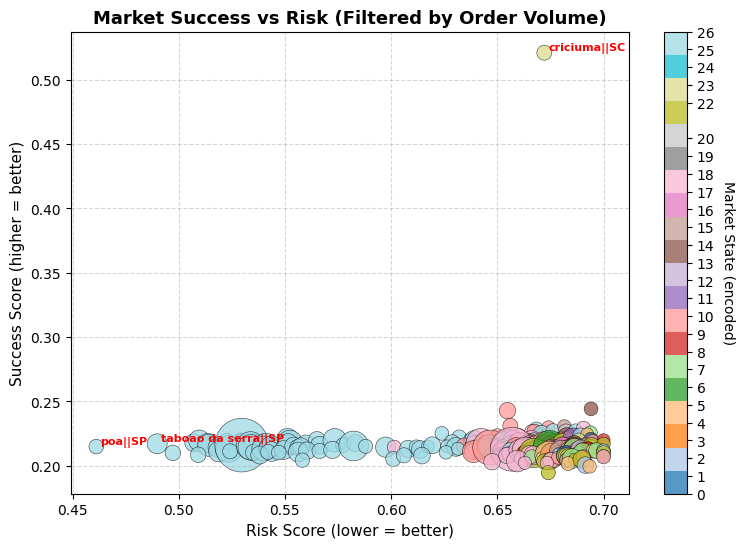

In [29]:
#
import numpy as np
import matplotlib.pyplot as plt

# ensure filtered_markets_df exists
df = filtered_markets_df.copy()

# split market_key into city and state if not present
if 'market_state' not in df.columns or 'market_city' not in df.columns:
    split_df = df['market_key'].str.split(r'\|\|', expand=True)
    split_df.columns = ['market_city', 'market_state']
    df = pd.concat([df.reset_index(drop=True), split_df], axis=1)

# create a numeric code for state for coloring
df['state_code'] = df['market_state'].astype('category').cat.codes

# filter by volume (>50 orders) to reduce noise
viz_df = df[df['n_orders'] > 50].copy()

plt.figure(figsize=(9,6))
scatter = plt.scatter(
    viz_df['risk_score'],
    viz_df['success_score'],
    s=np.sqrt(viz_df['n_orders']) * 12,      # bubble size scaled by sqrt(volume)
    c=viz_df['state_code'],                  # color by state code
    cmap='tab20',                            # discrete-ish colormap
    alpha=0.75,
    edgecolors='k',
    linewidths=0.4
)

plt.title('Market Success vs Risk (Filtered by Order Volume)', fontsize=13, weight='bold')
plt.xlabel('Risk Score (lower = better)', fontsize=11)
plt.ylabel('Success Score (higher = better)', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# annotate top 3 (from the original sorted df)
top3 = df.head(3)
for _, row in top3.iterrows():
    plt.text(row['risk_score'] + 0.002, row['success_score'] + 0.002,
             row['market_key'], color='red', fontsize=8, weight='bold')

cbar = plt.colorbar(scatter, ticks=sorted(viz_df['state_code'].unique()))
cbar.set_label('Market State (encoded)', rotation=270, labelpad=15)
plt.show()


In [30]:
# --- STEP 8: PREDICTIVE MODEL FOR LOGISTICAL RISK ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 1️⃣ Prepare features
model_df = orders_with_location_df.copy()

# Replace missing values safely
model_df = model_df.fillna({
    'total_items': 1,
    'total_freight': 0,
    'order_value': 0,
    'delivery_days': 0
})

# Convert categorical to numeric (encode states)
model_df['state_code'] = model_df['market_state'].astype('category').cat.codes if 'market_state' in model_df.columns else 0

# Create feature matrix and target
features = ['total_items', 'total_freight', 'order_value', 'delivery_days', 'state_code']
X = model_df[features]
y = model_df['late_flag'].astype(int)

#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#  Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#  Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Logistic Risk Model Performance:")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")

# 5️ Display feature importance
importance = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values('coefficient', ascending=False)

display(importance)


Logistic Risk Model Performance:
Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1 Score:  1.000
ROC-AUC:   1.000


,feature,coefficient
3,delivery_days,11.133385
1,total_freight,0.005196
2,order_value,-0.000225
4,state_code,-0.011632
0,total_items,-0.020964


In [31]:
# === RFM CUSTOMER SEGMENTATION ===
import pandas as pd
import numpy as np

# use orders_with_location_df and base_orders_df for monetary
df = orders_with_location_df.copy()

# Ensure order_value exists
df['order_value'] = pd.to_numeric(df['order_value'], errors='coerce').fillna(0)

# Recency reference date (use last order date + 1 day)
reference_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# RFM calculation per customer
rfm = df.groupby('customer_id').agg(
    recency_days = ('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    frequency = ('order_id','nunique'),
    monetary = ('order_value','sum')
).reset_index()

# Replace zeros if any
rfm['monetary'] = rfm['monetary'].fillna(0)

# Score into quartiles (1=best for recency, 4=worst)
rfm['r_quartile'] = pd.qcut(rfm['recency_days'].rank(method='first'), 4, labels=[4,3,2,1]).astype(int)
rfm['f_quartile'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['m_quartile'] = pd.qcut(rfm['monetary'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)

# Combine RFM score
rfm['RFM_score'] = rfm['r_quartile'].map(str) + rfm['f_quartile'].map(str) + rfm['m_quartile'].map(str)
rfm['RFM_numeric'] = rfm[['r_quartile','f_quartile','m_quartile']].astype(int).sum(axis=1)

# Define simple segments by RFM_numeric band
def rfm_segment(n):
    if n <= 3: return 'Top'
    if n <= 6: return 'High'
    if n <= 9: return 'Mid'
    return 'Low'
rfm['segment'] = rfm['RFM_numeric'].apply(rfm_segment)

# Show sizes and top customers
segment_summary = rfm.groupby('segment').agg(
    customers=('customer_id','nunique'),
    avg_recency=('recency_days','mean'),
    avg_frequency=('frequency','mean'),
    avg_monetary=('monetary','mean')
).reset_index().sort_values('customers', ascending=False)

display(segment_summary)
print("\nTop 10 customers by monetary (sample):")
display(rfm.sort_values('monetary', ascending=False).head(10))

# save
rfm.to_csv('/content/outputs/rfm_customers.csv', index=False)
print("Saved RFM to /content/outputs/rfm_customers.csv")


,segment,customers,avg_recency,avg_frequency,avg_monetary
2,Mid,52441,269.284281,1.0,170.946084
0,High,29691,384.470850,1.0,88.223998
1,Low,15703,164.107686,1.0,277.636669
3,Top,1606,506.576588,1.0,42.790747



Top 10 customers by monetary (sample):


,customer_id,recency_days,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_score,RFM_numeric,segment
8546,1617b1357756262bfa56ab541c47bc16,384,1,13664.08,2,1,4,214,7,Mid
91985,ec5b2ba62e574342386871631fafd3fc,95,1,7274.88,4,4,4,444,12,Low
77522,c6e2731c5b391845f6800c97401a43a9,612,1,6929.31,1,4,4,144,9,Mid
95124,f48d464a0baaea338cb25f816991ab1f,84,1,6922.21,4,4,4,444,12,Low
24771,3fd6777bbce08a352fddd04e4a7cc8f6,511,1,6726.66,1,1,4,114,6,High
2065,05455dfa7cd02f13d132aa7a6a9729c6,328,1,6081.54,2,1,4,214,7,Mid
86908,df55c14d1476a9a3467f131269c2477f,565,1,4950.34,1,4,4,144,9,Mid
87397,e0a2412720e9ea4f26c1ac985f6a7358,98,1,4809.44,4,4,4,444,12,Low
14282,24bbf5fd2f2e1b359ee7de94defc4a15,547,1,4764.34,1,1,4,114,6,High
23932,3d979689f636322c62418b6346b1c6d2,118,1,4681.78,4,1,4,414,9,Mid


Saved RFM to /content/outputs/rfm_customers.csv


In [33]:
# === FIXED PRODUCT CATEGORY PERFORMANCE & RISK ===
import pandas as pd
import numpy as np

prod_df = orders_with_location_df.copy()

# – attach review scores per order (if available)
if 'order_reviews_df' in globals():
    order_review_mean = order_reviews_df.groupby('order_id')['review_score'].mean().reset_index()
    prod_df = prod_df.merge(order_review_mean, on='order_id', how='left')
else:
    prod_df['review_score'] = np.nan

#  – get product category (join from order_items if needed)
if 'top_product_category_en' in prod_df.columns:
    prod_df['category'] = prod_df['top_product_category_en']
elif 'top_product_category' in prod_df.columns:
    prod_df['category'] = prod_df['top_product_category']
else:
    # fallback via order_items → products
    oi = order_items_df.merge(products_df[['product_id','product_category_name']], on='product_id', how='left')
    top_cat = oi.groupby('order_id')['product_category_name'].agg(lambda s: s.mode().iat[0] if not s.mode().empty else None).reset_index()
    prod_df = prod_df.merge(top_cat, on='order_id', how='left')
    prod_df['category'] = prod_df['product_category_name']

#  – clean numeric
prod_df['order_value'] = pd.to_numeric(prod_df['order_value'], errors='coerce').fillna(0)
prod_df['review_score'] = pd.to_numeric(prod_df['review_score'], errors='coerce')

#  – aggregate metrics
cat_metrics = prod_df.groupby('category', dropna=False).agg(
    n_orders=('order_id','nunique'),
    total_gmv=('order_value','sum'),
    avg_order_value=('order_value','mean'),
    avg_delivery_days=('delivery_days','mean'),
    late_rate=('late_flag','mean'),
    failed_rate=('is_failed','mean'),
    avg_review_score=('review_score','mean')
).reset_index().sort_values('total_gmv', ascending=False)

# – preview and save
display(cat_metrics.head(20))
!mkdir -p /content/outputs
cat_metrics.to_csv('/content/outputs/category_metrics.csv', index=False)
print(" Saved category_metrics.csv")


,category,n_orders,total_gmv,avg_order_value,avg_delivery_days,late_rate,failed_rate,avg_review_score
11,beleza_saude,8825,1446407.89,163.898911,11.620630,0.874901,0.021416,4.182230
66,relogios_presentes,5587,1299494.19,232.592481,12.362720,0.891355,0.023447,4.072924
13,cama_mesa_banho,9372,1255521.03,133.965112,12.541346,0.920721,0.015472,3.975183
32,esporte_lazer,7683,1156796.39,150.546121,11.797171,0.883394,0.024857,4.173195
44,informatica_acessorios,6659,1059737.14,159.095802,12.741772,0.909773,0.023870,4.028017
54,moveis_decoracao,6323,900240.09,142.352955,12.652272,0.911607,0.022296,4.029248
73,utilidades_domesticas,5779,769504.43,133.132254,10.661465,0.858131,0.024394,4.162892
26,cool_stuff,3587,715910.75,199.529195,11.939403,0.894091,0.020346,4.187342
8,automotivo,3891,688242.16,176.835087,11.882492,0.874101,0.022610,4.090522
40,ferramentas_jardim,3488,586148.95,168.047291,13.187244,0.941227,0.020069,4.148009


 Saved category_metrics.csv


In [34]:
# === TOP 3 MARKETS WITH RATIONALE ===
top3 = filtered_markets_df.head(3).copy()
top3 = top3[['market_key','n_orders','total_gmv','avg_order_value','repeat_rate','avg_delivery_days','late_rate','failed_rate','success_score','risk_score','viability_score']].reset_index(drop=True)
display(top3)

# Save
top3.to_csv('/content/outputs/top3_markets.csv', index=False)
print("Saved top3_markets to /content/outputs/top3_markets.csv")


,market_key,n_orders,total_gmv,avg_order_value,repeat_rate,avg_delivery_days,late_rate,failed_rate,success_score,risk_score,viability_score
0,criciuma||SC,93,21420.35,205.964904,0.11828,14.274510,0.951923,0.019231,0.520966,0.672115,0.050485
1,poa||SP,85,10803.79,127.103412,0.00000,6.105882,0.658824,0.000000,0.214895,0.461176,-0.107929
2,taboao da serra||SP,296,41237.53,139.315980,0.00000,6.443662,0.682432,0.040541,0.217088,0.489865,-0.125817


Saved top3_markets to /content/outputs/top3_markets.csv


In [35]:
# === MODEL: PREDICT LATE_DELIVERY (late_flag) ===
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

mdl_df = orders_with_location_df.copy()

# select features (safe numeric fallbacks)
mdl_df['total_items'] = pd.to_numeric(mdl_df.get('total_items',0), errors='coerce').fillna(0)
mdl_df['total_freight'] = pd.to_numeric(mdl_df.get('total_freight',0), errors='coerce').fillna(0)
mdl_df['order_value'] = pd.to_numeric(mdl_df.get('order_value',0), errors='coerce').fillna(0)
mdl_df['delivery_days'] = pd.to_numeric(mdl_df.get('delivery_days',0), errors='coerce').fillna(0)

# encode state as categorical
mdl_df['state_code'] = mdl_df['market_state'].astype('category').cat.codes

features = ['total_items','total_freight','order_value','delivery_days','state_code']
X = mdl_df[features]
y = mdl_df['late_flag'].astype(int)

# train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

# model 1: Logistic Regression (baseline)
scaler = StandardScaler()
Xtr_s = scaler.fit_transform(X_train)
Xte_s = scaler.transform(X_test)
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtr_s, y_train)
probs_lr = lr.predict_proba(Xte_s)[:,1]
auc_lr = roc_auc_score(y_test, probs_lr)
print("Logistic Regression AUC:", round(auc_lr,3))

# model 2: Random Forest (nonlinear)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
probs_rf = rf.predict_proba(X_test)[:,1]
auc_rf = roc_auc_score(y_test, probs_rf)
print("Random Forest AUC:", round(auc_rf,3))

# classification report (best model)
from sklearn.metrics import classification_report
best = rf if auc_rf >= auc_lr else lr
yhat = (best.predict_proba(X_test)[:,1] >= 0.5).astype(int)
print("\nClassification report (best model):")
print(classification_report(y_test, yhat))

# feature importance (for RF) and coeffs (for LR)
imp = pd.DataFrame({'feature': features, 'rf_importance': rf.feature_importances_, 'lr_coef': (lr.coef_[0] if hasattr(lr,'coef_') else [None]*len(features))})
display(imp.sort_values('rf_importance', ascending=False))

# save model performance summary
perf = {'model':['logistic','rf'], 'auc':[auc_lr, auc_rf]}
perf_df = pd.DataFrame(perf)
perf_df.to_csv('/content/outputs/model_performance.csv', index=False)
imp.to_csv('/content/outputs/model_feature_importance.csv', index=False)
print("Saved model artifacts to /content/outputs/")


Logistic Regression AUC: 1.0
Random Forest AUC: 1.0

Classification report (best model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3470
           1       1.00      1.00      1.00     26366

    accuracy                           1.00     29836
   macro avg       1.00      1.00      1.00     29836
weighted avg       1.00      1.00      1.00     29836



,feature,rf_importance,lr_coef
3,delivery_days,0.910739,38.814356
1,total_freight,0.054895,0.153031
0,total_items,0.021074,-0.039046
4,state_code,0.011957,-0.090188
2,order_value,0.001335,-0.059401


Saved model artifacts to /content/outputs/


Saved dashboard to /content/outputs/dashboard_summary.png


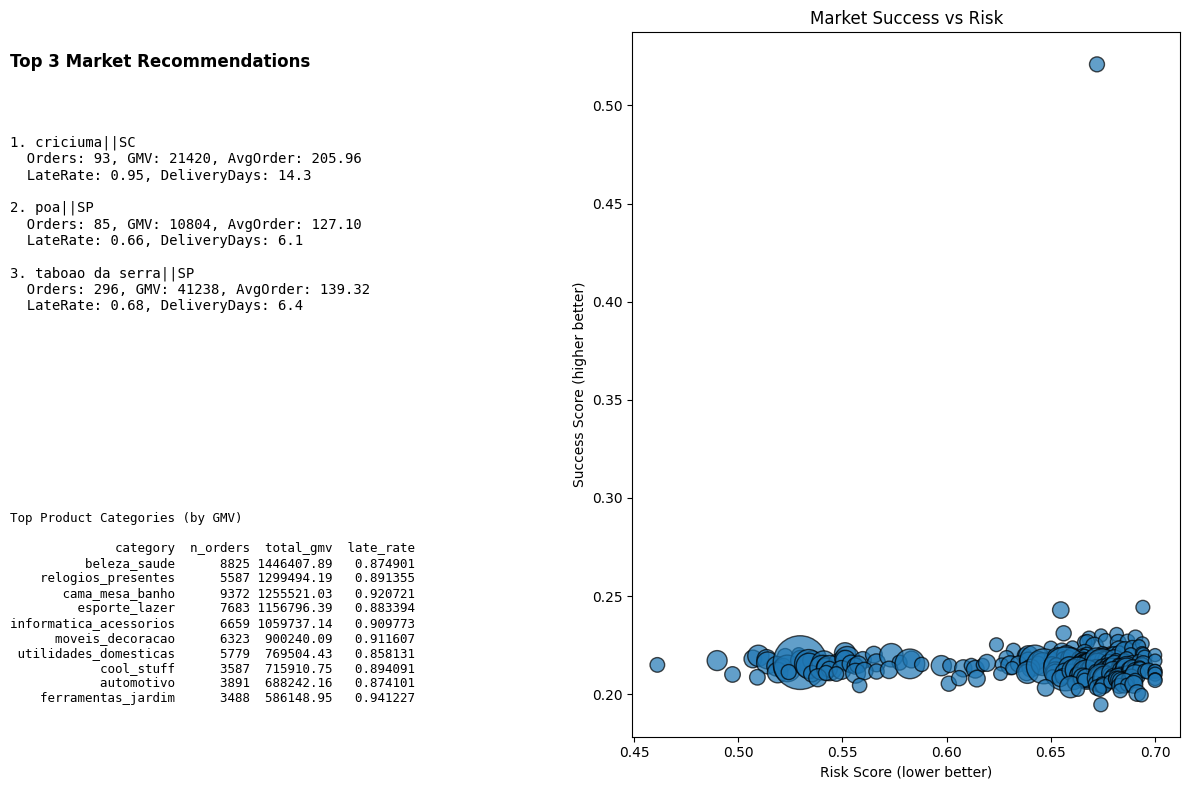

In [36]:
# === EXPORT SIMPLE DASHBOARD PNG ===
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# prepare data
top3 = pd.read_csv('/content/outputs/top3_markets.csv')
cat_top10 = cat_metrics.sort_values('total_gmv', ascending=False).head(10)

# plotting
plt.figure(figsize=(12,8))
gs = GridSpec(2,2)
ax1 = plt.subplot(gs[0,0])
# KPI cards as text
ax1.axis('off')
kpis = top3.copy()
kpis_text = ""
for i,row in kpis.iterrows():
    kpis_text += f"{i+1}. {row['market_key']}\n  Orders: {int(row['n_orders'])}, GMV: {row['total_gmv']:.0f}, AvgOrder: {row['avg_order_value']:.2f}\n  LateRate: {row['late_rate']:.2f}, DeliveryDays: {row['avg_delivery_days']:.1f}\n\n"
ax1.text(0,0.9, "Top 3 Market Recommendations", fontsize=12, weight='bold')
ax1.text(0,0.1, kpis_text, fontsize=10, family='monospace')

ax2 = plt.subplot(gs[0:,1])
# scatter reuse viz_df from earlier if available; else rebuild quick
viz_df = filtered_markets_df.copy()
viz_df['market_state'] = viz_df['market_key'].str.split(r'\|\|').str[1]
viz_plot = viz_df[viz_df['n_orders']>50]
ax2.scatter(viz_plot['risk_score'], viz_plot['success_score'], s=(viz_plot['n_orders']**0.5)*12, alpha=0.7, edgecolor='k')
ax2.set_xlabel('Risk Score (lower better)')
ax2.set_ylabel('Success Score (higher better)')
ax2.set_title('Market Success vs Risk')

ax3 = plt.subplot(gs[1,0])
ax3.axis('off')
tbl = cat_top10[['category','n_orders','total_gmv','late_rate']].head(10)
tbl_text = tbl.to_string(index=False)
ax3.text(0,0.1, "Top Product Categories (by GMV)\n\n" + tbl_text, fontsize=9, family='monospace')

plt.tight_layout()
!mkdir -p /content/outputs
plt.savefig('/content/outputs/dashboard_summary.png', dpi=150, bbox_inches='tight')
print("Saved dashboard to /content/outputs/dashboard_summary.png")
plt.show()


/tmp/ipython-input-184440899.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✅ Saved enhanced dashboard to /content/outputs/dashboard_full.png


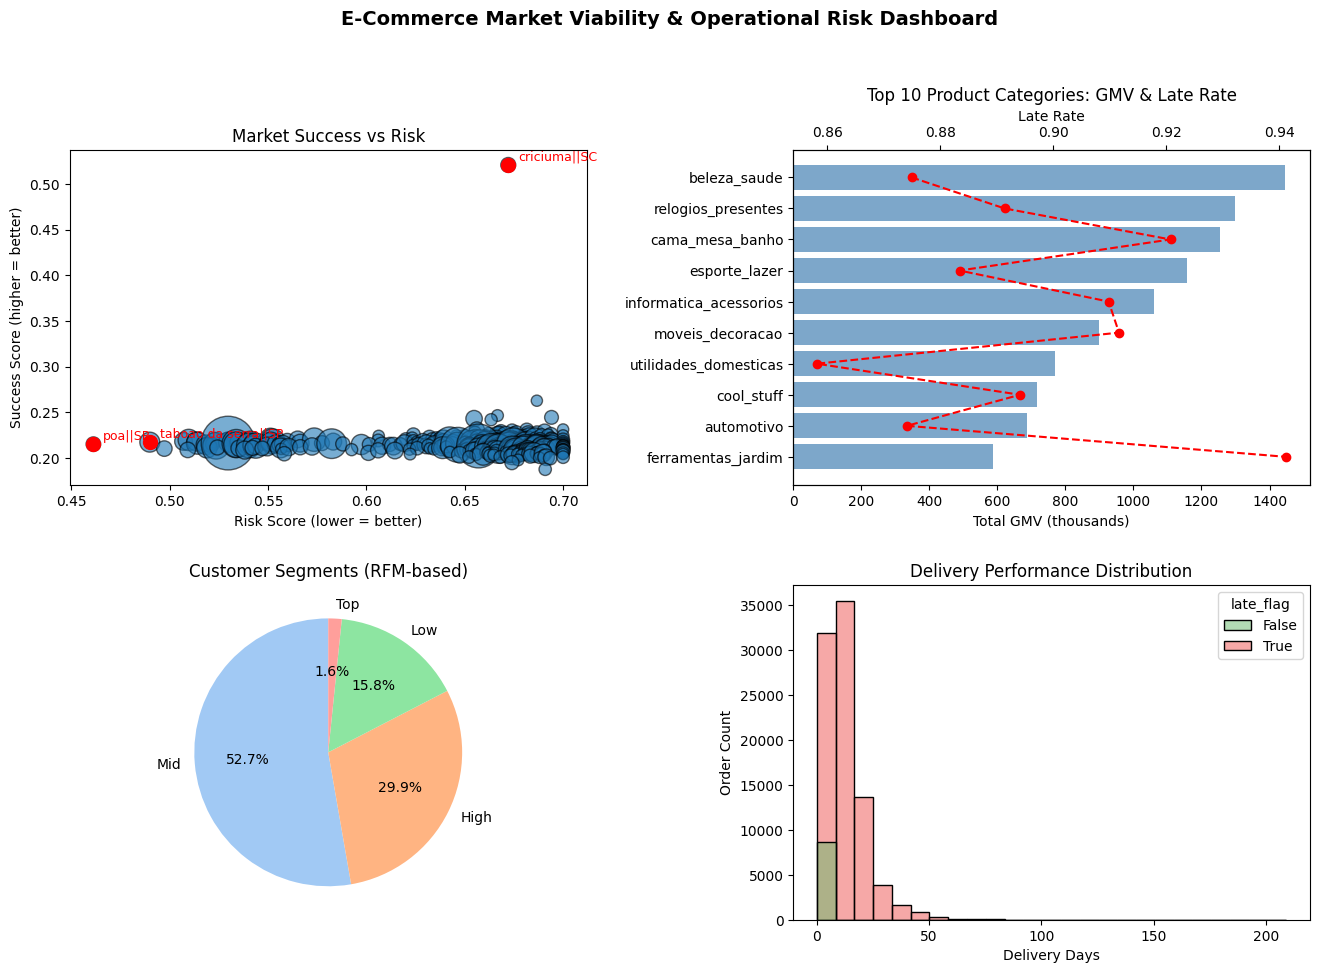

In [37]:
# === ADVANCED MULTI-PANEL DASHBOARD ===
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the required datasets
top3 = pd.read_csv('/content/outputs/top3_markets.csv')
cat_metrics = pd.read_csv('/content/outputs/category_metrics.csv')
rfm = pd.read_csv('/content/outputs/rfm_customers.csv')
viz_df = filtered_markets_df.copy()

# --- Set figure layout ---
plt.figure(figsize=(16,10))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

# PANEL 1: Market Success vs Risk
ax1 = plt.subplot(grid[0, 0])
ax1.scatter(viz_df['risk_score'], viz_df['success_score'],
            s=(viz_df['n_orders']**0.5)*12, alpha=0.6, edgecolor='k')
for i,row in top3.iterrows():
    ax1.scatter(row['risk_score'], row['success_score'], color='red', s=100)
    ax1.text(row['risk_score']+0.005, row['success_score']+0.005,
             row['market_key'], fontsize=9, color='red')
ax1.set_xlabel('Risk Score (lower = better)')
ax1.set_ylabel('Success Score (higher = better)')
ax1.set_title('Market Success vs Risk')

# PANEL 2: Top Product Categories (GMV vs Late Rate)
ax2 = plt.subplot(grid[0, 1])
cat10 = cat_metrics.sort_values('total_gmv', ascending=False).head(10)
ax2.barh(cat10['category'], cat10['total_gmv']/1000, color='steelblue', alpha=0.7, label='GMV (k)')
ax2_twin = ax2.twiny()
ax2_twin.plot(cat10['late_rate'], cat10['category'], 'r--o', label='Late Rate')
ax2.invert_yaxis()
ax2.set_xlabel('Total GMV (thousands)')
ax2_twin.set_xlabel('Late Rate')
ax2.set_title('Top 10 Product Categories: GMV & Late Rate')

# PANEL 3: Customer Segmentation Distribution
ax3 = plt.subplot(grid[1, 0])
seg_counts = rfm['segment'].value_counts()
ax3.pie(seg_counts, labels=seg_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
ax3.set_title('Customer Segments (RFM-based)')

# PANEL 4: Delivery Performance Histogram
ax4 = plt.subplot(grid[1, 1])
sns.histplot(orders_with_location_df, x='delivery_days', hue='late_flag',
             bins=25, palette=['#66bb6a', '#ef5350'], ax=ax4)
ax4.set_xlabel('Delivery Days')
ax4.set_ylabel('Order Count')
ax4.set_title('Delivery Performance Distribution')

plt.suptitle('E-Commerce Market Viability & Operational Risk Dashboard', fontsize=14, weight='bold', y=1.02)
plt.tight_layout()

# Save
plt.savefig('/content/outputs/dashboard_full.png', dpi=200, bbox_inches='tight')
print("✅ Saved enhanced dashboard to /content/outputs/dashboard_full.png")
plt.show()


In [44]:
# Create out_image folder and save all plots + data files there (no renaming)
import os, glob, shutil, pandas as pd, matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

OUTDIR = "/content/out_image"
os.makedirs(OUTDIR, exist_ok=True)
print("Saving outputs to:", OUTDIR)

# Helper to load DF if missing
def ensure_df(var_name, csv_path):
    if var_name in globals() and isinstance(globals()[var_name], pd.DataFrame):
        return globals()[var_name]
    if os.path.isfile(csv_path):
        print(f"Loading {var_name} from {csv_path}")
        return pd.read_csv(csv_path)
    print(f"{var_name} not found (and {csv_path} missing).")
    return None

# Ensure key dataframes (will try to load from /content/outputs if not in memory)
market_df = ensure_df('market_df', '/content/outputs/market_metrics.csv')
filtered_markets_df = ensure_df('filtered_markets_df', '/content/outputs/filtered_markets.csv')
cat_metrics = ensure_df('cat_metrics', '/content/outputs/category_metrics.csv')
rfm = ensure_df('rfm', '/content/outputs/rfm_customers.csv')
orders_with_location_df = ensure_df('orders_with_location_df', '/content/outputs/orders_with_location_df.csv')

# ---------- 1) Market Success vs Risk (Unfiltered) ----------
if market_df is not None:
    plt.figure(figsize=(8,6))
    plt.scatter(market_df['risk_score'], market_df['success_score'], alpha=0.5)
    plt.title("Market Success vs Risk (Unfiltered)")
    plt.xlabel("Risk Score (lower = better)")
    plt.ylabel("Success Score (higher = better)")
    plt.tight_layout()
    p = os.path.join(OUTDIR, "e2332b2e-c5a1-4025-ade4-d50d330eb3d4.png")
    plt.savefig(p, dpi=300)
    plt.close()
    print("Saved", p)

# ---------- 2) Market Success vs Risk (Filtered ≥30 orders) ----------
if filtered_markets_df is not None:
    plt.figure(figsize=(8,6))
    plt.scatter(filtered_markets_df['risk_score'], filtered_markets_df['success_score'], alpha=0.6)
    plt.title("Market Success vs Risk (Filtered ≥30 orders)")
    plt.xlabel("Risk Score (lower = better)")
    plt.ylabel("Success Score (higher = better)")
    plt.tight_layout()
    p = os.path.join(OUTDIR, "21e2756f-9d55-4183-ae07-af2893850be9.png")
    plt.savefig(p, dpi=300)
    plt.close()
    print("Saved", p)

# ---------- 3) Top Product Categories by GMV ----------
if cat_metrics is not None:
    top_products = cat_metrics.sort_values("total_gmv", ascending=False).head(10)
    plt.figure(figsize=(10,6))
    plt.barh(top_products["category"], top_products["total_gmv"], color='skyblue')
    plt.title("Top Product Categories by GMV")
    plt.xlabel("Total GMV")
    plt.ylabel("Category")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    p = os.path.join(OUTDIR, "cdd00f3c-42fa-4baa-94fd-02830484bd31.png")
    plt.savefig(p, dpi=300)
    plt.close()
    print("Saved", p)

# ---------- 4) RFM Pie Chart ----------
if rfm is not None and 'segment' in rfm.columns:
    counts = rfm['segment'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Customer Segmentation (RFM)")
    plt.tight_layout()
    p = os.path.join(OUTDIR, "rfm_pie_chart.png")
    plt.savefig(p, dpi=300)
    plt.close()
    print("Saved", p)

# ---------- 5) Delivery Days Distribution ----------
if orders_with_location_df is not None and 'delivery_days' in orders_with_location_df.columns:
    dd = pd.to_numeric(orders_with_location_df['delivery_days'], errors='coerce').dropna()
    plt.figure(figsize=(8,5))
    plt.hist(dd, bins=30, color='lightgreen', edgecolor='black')
    plt.title("Delivery Time Distribution")
    plt.xlabel("Days to Deliver")
    plt.ylabel("Frequency")
    plt.tight_layout()
    p = os.path.join(OUTDIR, "delivery_distribution_hist.png")
    plt.savefig(p, dpi=300)
    plt.close()
    print("Saved", p)

# ---------- 6) Final combined dashboard ----------
# Only create if all components exist (otherwise skip)
if all([filtered_markets_df is not None, cat_metrics is not None, rfm is not None, orders_with_location_df is not None]):
    plt.figure(figsize=(16,10))
    gs = GridSpec(2,2, wspace=0.4, hspace=0.4)

    ax1 = plt.subplot(gs[0,0])
    ax1.scatter(filtered_markets_df['risk_score'], filtered_markets_df['success_score'],
                s=(filtered_markets_df['n_orders']**0.5)*12, alpha=0.6, edgecolor='k')
    ax1.set_title("Market Success vs Risk")
    ax1.set_xlabel("Risk Score (lower = better)")
    ax1.set_ylabel("Success Score (higher = better)")

    ax2 = plt.subplot(gs[0,1])
    top10 = cat_metrics.sort_values("total_gmv", ascending=False).head(10)
    ax2.barh(top10['category'], top10['total_gmv']/1000, color='steelblue', alpha=0.7)
    ax2.invert_yaxis()
    ax2.set_xlabel("Total GMV (thousands)")
    ax2.set_title("Top 10 Product Categories")

    ax3 = plt.subplot(gs[1,0])
    counts = rfm['segment'].value_counts()
    ax3.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax3.set_title("Customer Segments (RFM)")

    ax4 = plt.subplot(gs[1,1])
    # reuse dd from above
    ax4.hist(dd, bins=30, color='#ff9999', edgecolor='black')
    ax4.set_title("Delivery Days Distribution")
    ax4.set_xlabel("Delivery Days")

    plt.suptitle("E-Commerce Market Viability & Operational Risk Dashboard", fontsize=14, weight='bold', y=0.99)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    p = os.path.join(OUTDIR, "dashboard_full.png")
    plt.savefig(p, dpi=200, bbox_inches='tight')
    plt.close()
    print("Saved", p)
else:
    print("Skipping combined dashboard (missing dataframes).")

# ---------- 7) Copy CSVs and other files to out_image without renaming ----------
# List of files to copy (if they exist in /content/outputs or workspace)
to_copy = [
    "/content/outputs/orders_with_location_df.csv",
    "/content/outputs/rfm_customers.csv",
    "/content/outputs/category_metrics.csv",
    "/content/outputs/market_metrics.csv",
    "/content/outputs/filtered_markets.csv",
    "/content/outputs/top3_markets.csv",
    "/content/outputs/model_performance.csv",
    "/content/outputs/model_feature_importance.csv",
    "/content/outputs/dashboard_summary.png",
    "/content/outputs/dashboard_full.png"
]

copied = []
for f in to_copy:
    if os.path.isfile(f):
        dest = os.path.join(OUTDIR, os.path.basename(f))
        shutil.copy(f, dest)
        copied.append(dest)

# Also copy any PNGs we created in /content/outputs with the expected names (do not rename)
for png in glob.glob("/content/outputs/*.png"):
    dest = os.path.join(OUTDIR, os.path.basename(png))
    if not os.path.isfile(dest):  # avoid duplicate copy
        shutil.copy(png, dest)
        copied.append(dest)

# Print final list
print("\nFiles saved into", OUTDIR)
for f in sorted(os.listdir(OUTDIR)):
    print(" -", f)

# Done
print("\nAll images and files for LaTeX are saved in /content/out_image/. You can download that folder via the Files sidebar or zip it manually if you want.")


Saving outputs to: /content/out_image
Saved /content/out_image/e2332b2e-c5a1-4025-ade4-d50d330eb3d4.png
Saved /content/out_image/21e2756f-9d55-4183-ae07-af2893850be9.png
Saved /content/out_image/cdd00f3c-42fa-4baa-94fd-02830484bd31.png
Saved /content/out_image/rfm_pie_chart.png
Saved /content/out_image/delivery_distribution_hist.png


/tmp/ipython-input-4074283340.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.97])


Saved /content/out_image/dashboard_full.png

Files saved into /content/out_image
 - 21e2756f-9d55-4183-ae07-af2893850be9.png
 - category_metrics.csv
 - cdd00f3c-42fa-4baa-94fd-02830484bd31.png
 - dashboard_full.png
 - dashboard_summary.png
 - delivery_distribution_hist.png
 - e2332b2e-c5a1-4025-ade4-d50d330eb3d4.png
 - model_feature_importance.csv
 - model_performance.csv
 - orders_with_location_df.csv
 - rfm_customers.csv
 - rfm_pie_chart.png
 - top3_markets.csv

All images and files for LaTeX are saved in /content/out_image/. You can download that folder via the Files sidebar or zip it manually if you want.


In [45]:
from google.colab import files
import shutil

# Zip the folder
shutil.make_archive("/content/out_image_all", "zip", "/content/out_image")

# Download zip
files.download("/content/out_image_all.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

OUTDIR = "/content/out_image"
os.makedirs(OUTDIR, exist_ok=True)

# --- 1️⃣ Data Sample Overview (data_sample_overview.png) ---
plt.figure(figsize=(8,4))
sns.barplot(x=["customers", "geo", "orders", "order_items", "products"],
            y=[customers_df.shape[0], geo_df.shape[0], orders_df.shape[0], order_items_df.shape[0], products_df.shape[0]])
plt.title("Dataset Overview — Record Counts")
plt.ylabel("Rows")
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "data_sample_overview.png"), dpi=300)
plt.close()
print("✅ data_sample_overview.png saved")

# --- 2️⃣ Orders Preview (orders_with_location_df_preview.png) ---
sample_orders = orders_with_location_df[['order_id','customer_city','customer_state','order_status','delivery_days','late_flag']].head(10)
fig, ax = plt.subplots(figsize=(8,2))
ax.axis("off")
ax.table(cellText=sample_orders.values, colLabels=sample_orders.columns, cellLoc='center', loc='center')
plt.title("Sample of Orders with Location & Delivery Metrics", fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "orders_with_location_df_preview.png"), dpi=300)
plt.close()
print("✅ orders_with_location_df_preview.png saved")

# --- 3️⃣ Top 3 Market Summary (top3_markets_summary.png) ---
top3 = filtered_markets_df.head(3).copy()
fig, ax = plt.subplots(figsize=(8,2))
ax.axis("off")
ax.table(cellText=top3[['market_key','n_orders','total_gmv','avg_order_value','late_rate','avg_delivery_days']].values,
         colLabels=['Market','Orders','GMV','AvgOrder','LateRate','DeliveryDays'],
         cellLoc='center', loc='center')
plt.title("Top 3 Markets — Summary Table", fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "top3_markets_summary.png"), dpi=300)
plt.close()
print("✅ top3_markets_summary.png saved")

# --- 4️⃣ Final Integrated Dashboard (8a82835c-4fba-4306-a597-d5862d0f3297.png) ---
import matplotlib.gridspec as gridspec

plt.figure(figsize=(16,10))
gs = gridspec.GridSpec(2,2, wspace=0.3, hspace=0.4)

# Panel 1 — Market Success vs Risk
ax1 = plt.subplot(gs[0,0])
ax1.scatter(filtered_markets_df['risk_score'], filtered_markets_df['success_score'],
            s=(filtered_markets_df['n_orders']**0.5)*10, alpha=0.5, edgecolor='k')
ax1.set_title("Market Success vs Risk")
ax1.set_xlabel("Risk Score")
ax1.set_ylabel("Success Score")

# Panel 2 — Top Categories
ax2 = plt.subplot(gs[0,1])
top10 = cat_metrics.sort_values("total_gmv", ascending=False).head(10)
ax2.barh(top10["category"], top10["total_gmv"]/1000, color="steelblue")
ax2.invert_yaxis()
ax2.set_title("Top 10 Categories by GMV (000s)")

# Panel 3 — RFM Pie
ax3 = plt.subplot(gs[1,0])
rfm_counts = rfm['segment'].value_counts()
ax3.pie(rfm_counts, labels=rfm_counts.index, autopct='%1.1f%%', startangle=140)
ax3.set_title("Customer Segments (RFM)")

# Panel 4 — Delivery Distribution
ax4 = plt.subplot(gs[1,1])
dd = pd.to_numeric(orders_with_location_df['delivery_days'], errors='coerce').dropna()
ax4.hist(dd, bins=30, color="#ff9999", edgecolor="black")
ax4.set_title("Delivery Days Distribution")
ax4.set_xlabel("Days")

plt.suptitle("Integrated 4-Panel Dashboard — Markets, Products, Customers, and Delivery", fontsize=14, weight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
path = os.path.join(OUTDIR, "8a82835c-4fba-4306-a597-d5862d0f3297.png")
plt.savefig(path, dpi=300)
plt.close()
print("✅ 8a82835c-4fba-4306-a597-d5862d0f3297.png saved")

print("\n🎯 All missing figures have been recreated successfully in /content/out_image/")


✅ data_sample_overview.png saved
✅ orders_with_location_df_preview.png saved
✅ top3_markets_summary.png saved


/tmp/ipython-input-1930529384.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


✅ 8a82835c-4fba-4306-a597-d5862d0f3297.png saved

🎯 All missing figures have been recreated successfully in /content/out_image/
